In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import numpy as np
import pandas as pd
import g3py as g3
import pymc3 as pm
import theano as th
import theano.tensor as tt

g3.style_big_seaborn()
g3.style_widget()

/opt/anaconda3/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Samples DataSets

In [2]:
x, y = g3.data_sunspots()
y /= y.max()
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, 0.1, plot=False)

::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

Total: 309 | Obs: 30 (9.70873786407767%)


In [3]:
obs_j = np.array([ 32,  37,  40,  77,  78,  84, 105, 114, 122, 123, 135, 137, 145,
       153, 156, 160, 177, 206, 224, 229, 241, 245, 249, 258, 267, 275,
       290, 291, 296, 304])
x_obs, y_obs = x[obs_j], y[obs_j]

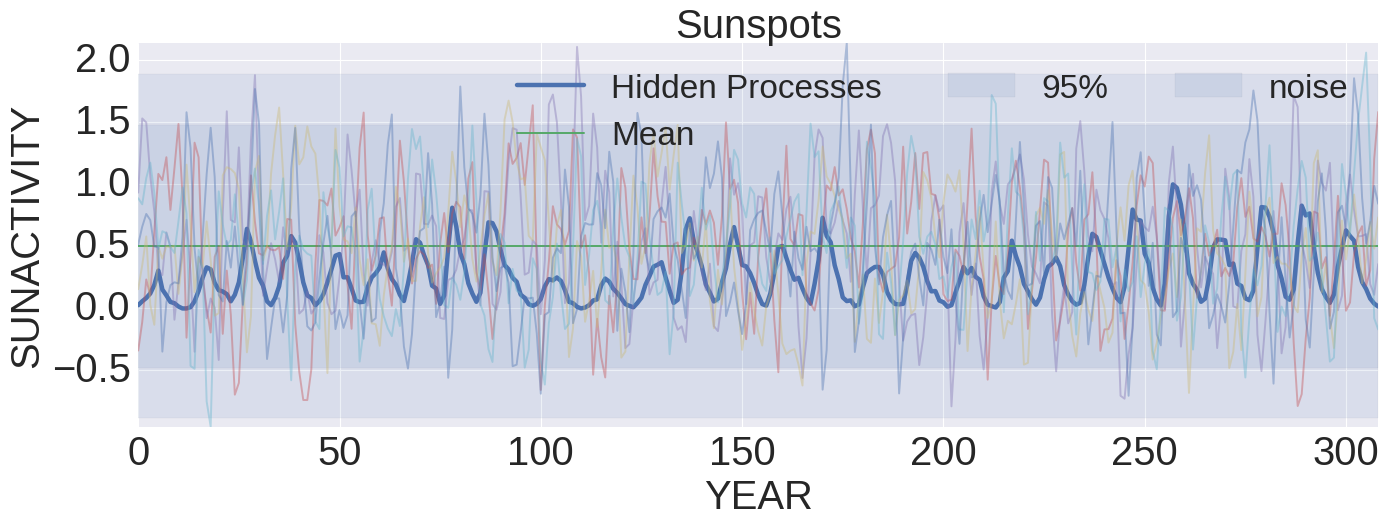

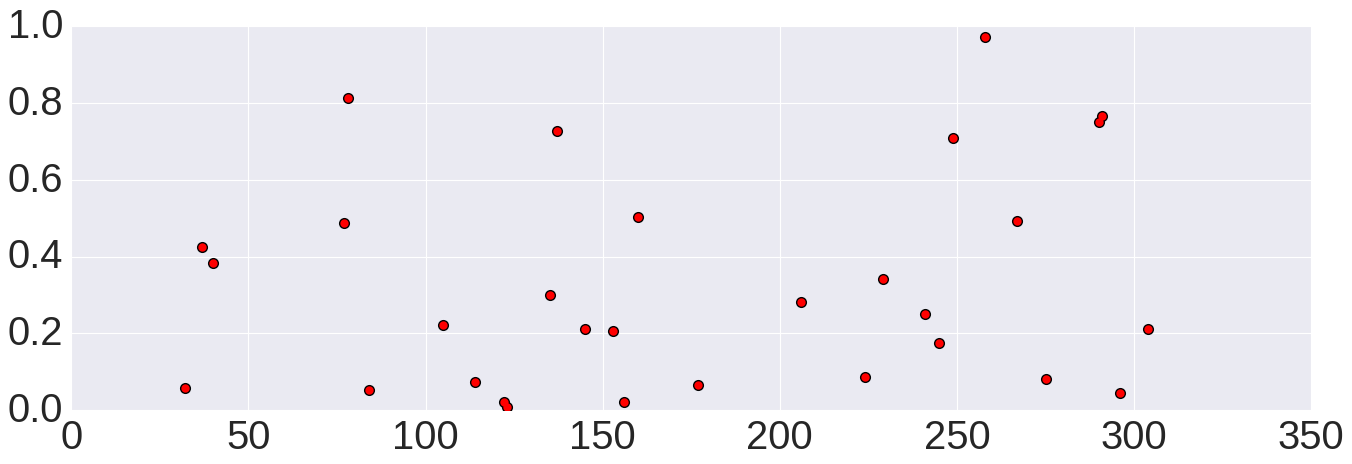

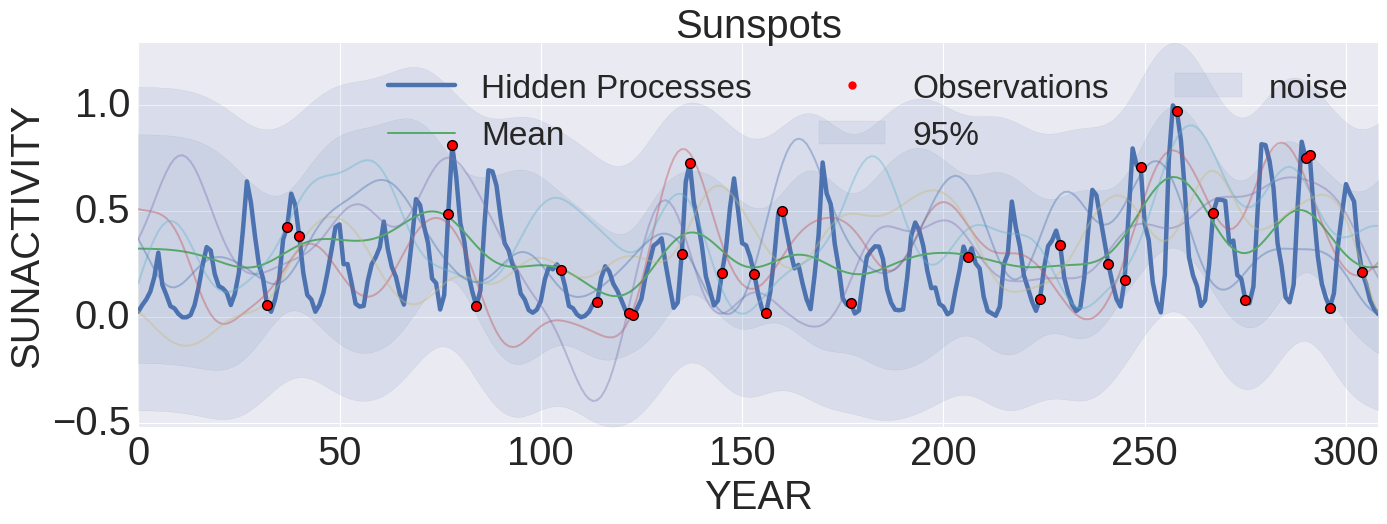

Starting function value (-logp): 6.44918

start_bfgs
         Current function value: 1.479027
         Iterations: 27
         Function evaluations: 50
         Gradient evaluations: 36

start_powell
Optimization terminated successfully.
         Current function value: 1.479305
         Iterations: 12
         Function evaluations: 716


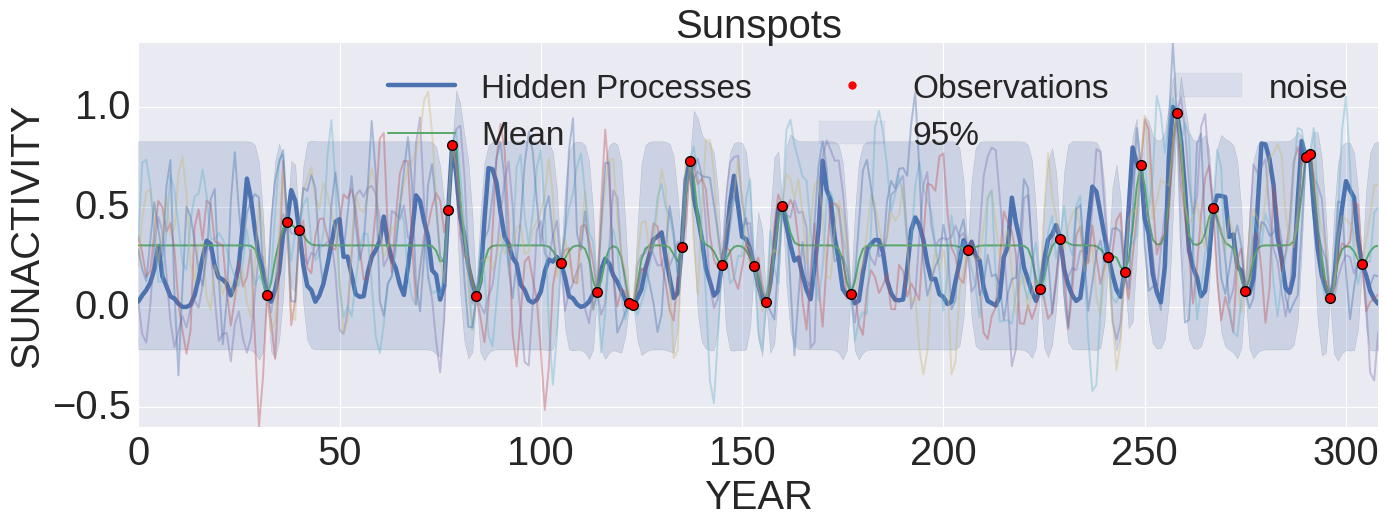

(<g3py.processes.gaussian.GaussianProcess at 0x7fad044ea3c8>,
 [GP_Bias_Bias, GP_SE_var_log_, GP_SE_rate_log_, GP_Noise_var_log_],
 {'array_posterior_dlogp': <g3py.libs.tensors.makefn at 0x7facef1118d0>,
  'array_posterior_logp': <g3py.libs.tensors.makefn at 0x7facef1007b8>,
  'posterior_cholesky': <g3py.libs.tensors.makefn at 0x7facef3a9128>,
  'posterior_dlogp': <g3py.libs.tensors.makefn at 0x7fad048ae710>,
  'posterior_kernel_sd': <g3py.libs.tensors.makefn at 0x7facef8564e0>,
  'posterior_kernel_sd_noise': <g3py.libs.tensors.makefn at 0x7fad04656048>,
  'posterior_location': <g3py.libs.tensors.makefn at 0x7facefb9ae80>,
  'posterior_logp': <g3py.libs.tensors.makefn at 0x7fad04412b70>,
  'posterior_mean': <g3py.libs.tensors.makefn at 0x7facefd27978>,
  'posterior_std': <g3py.libs.tensors.makefn at 0x7facefba01d0>,
  'posterior_std_noise': <g3py.libs.tensors.makefn at 0x7facef6b7128>,
  'prior_cholesky': <g3py.libs.tensors.makefn at 0x7fad0416d630>,
  'prior_kernel_sd': <g3py.libs.ten

In [8]:
#gm = g3.GraphicalModel(name='Bayes', description='Holi', file='bayes.pkl', reset=True)
gp = g3.GP(space=x, hidden=y, location=g3.Bias(), kernel=g3.SE(), noise=True)
gp.describe('Sunspots','YEAR','SUNACTIVITY')
gp.plot(samples=5), g3.show()
gp.observed(inputs=x_obs, outputs=y_obs)
gp.plot_observations(), g3.show()
gp.plot(samples=5), g3.show()
gp.plot(gp.find_MAP(points=2), samples=5)
g3.plot_save('images/gp_sunspots0.pdf'), g3.show()

gp, gp.active, gp.active.model, gp.active.model.vars, gp.compiles, gp.params, gp.logp(gp.params), gp.scores(gp.params, logp=False)

{'GP_SE_rate_log_': array([-3.00293446], dtype=float32), 'GP_Bias_Bias': 0.63728559, 'GP_SE_var_log_': -0.32176822, 'GP_Noise_var_log_': -3.1975875} 
 -18.5605411529541 {'BiasL2': 0.075379021, 'BiasL1': 0.21083444}


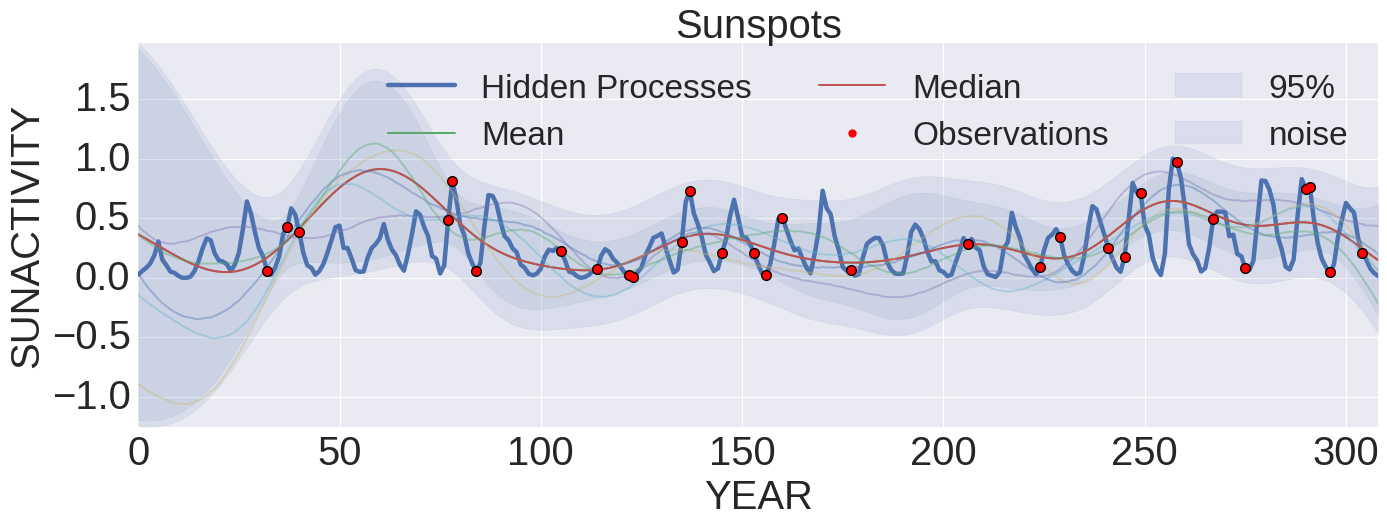

{'GP_SE_rate_log_': array([-6.74114895], dtype=float32), 'GP_Bias_Bias': 0.5491187, 'GP_SE_var_log_': -2.2492628, 'GP_Noise_var_log_': -1.8290223} 
 -8.993558883666992 {'BiasL2': 0.049600206, 'BiasL1': 0.18944223}


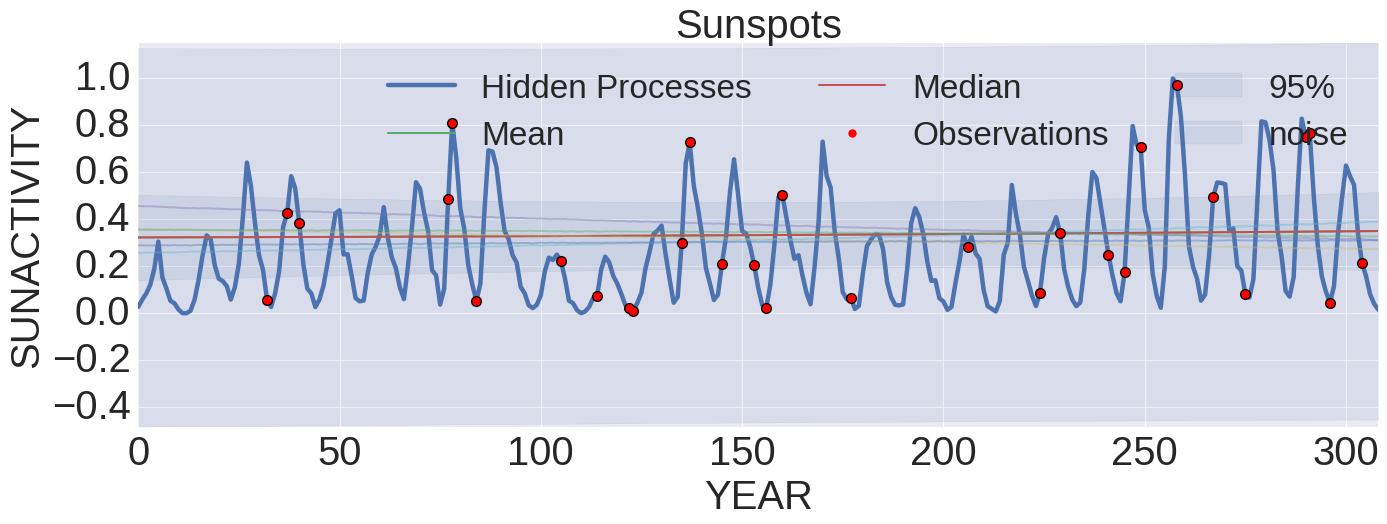

{'GP_SE_rate_log_': array([-5.52294159], dtype=float32), 'GP_Bias_Bias': 0.54562551, 'GP_SE_var_log_': 1.4109656, 'GP_Noise_var_log_': -0.62530857} 
 -24.762340545654297 {'BiasL2': 0.046655778, 'BiasL1': 0.18234618}


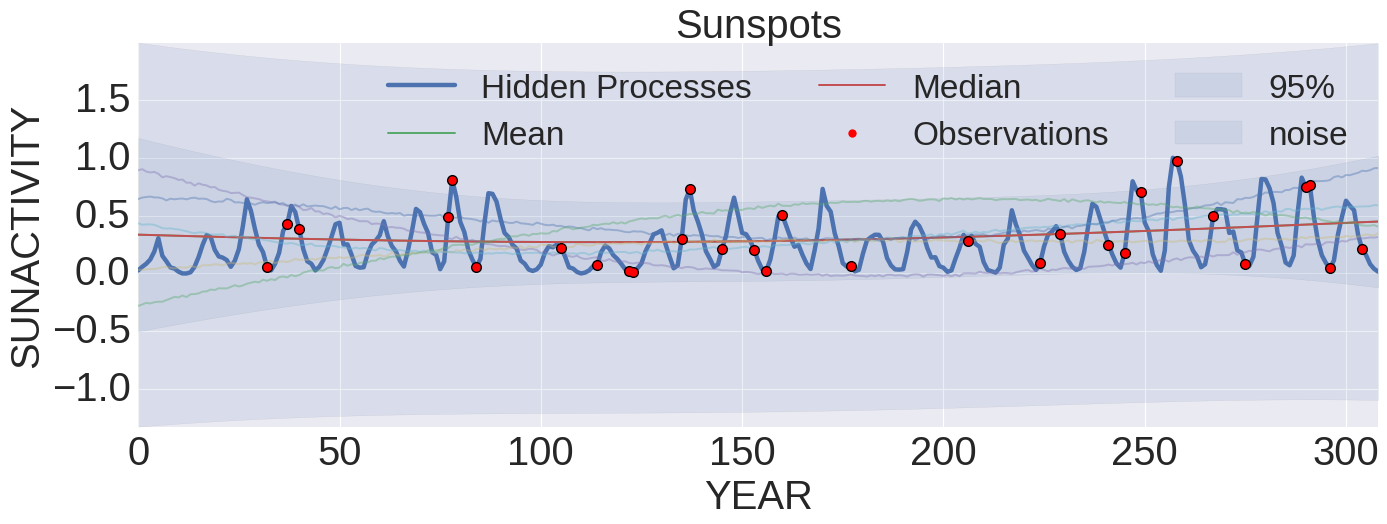

{'GP_SE_rate_log_': array([-4.39172411], dtype=float32), 'GP_Bias_Bias': 0.018554863, 'GP_SE_var_log_': -4.2009277, 'GP_Noise_var_log_': -0.2464474} 
 -26.961315155029297 {'BiasL2': 0.075029545, 'BiasL1': 0.19668987}


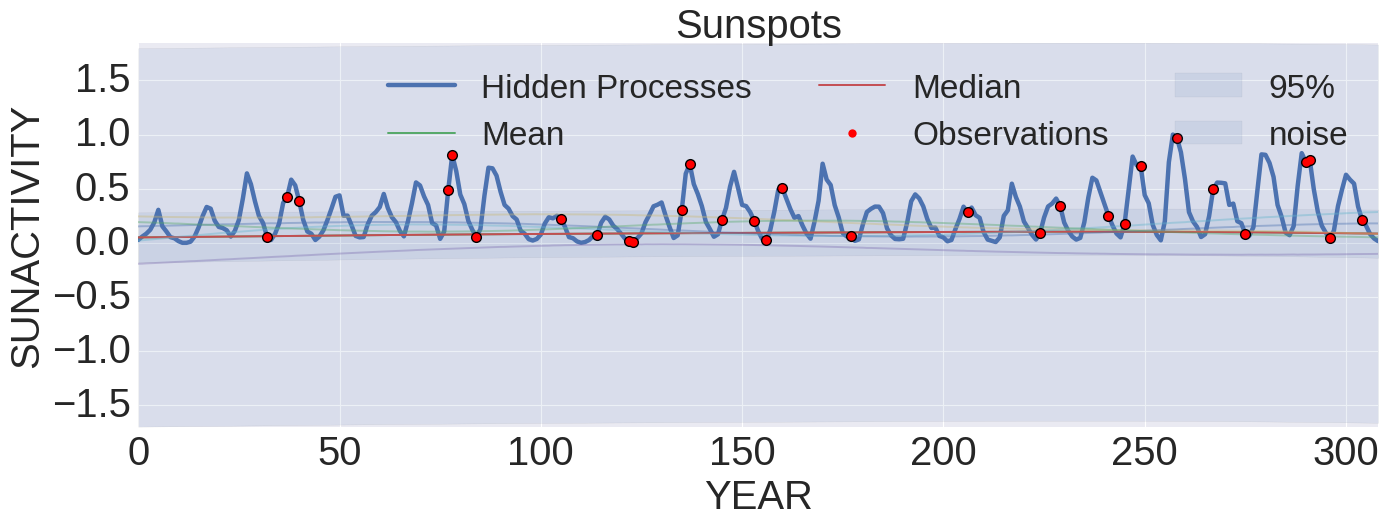

{'GP_SE_rate_log_': array([ 0.38386965], dtype=float32), 'GP_Bias_Bias': -0.19920036, 'GP_SE_var_log_': -2.2023087, 'GP_Noise_var_log_': -8.7700024} 
 -38.0491943359375 {'BiasL2': 0.19360036, 'BiasL1': 0.37978226}


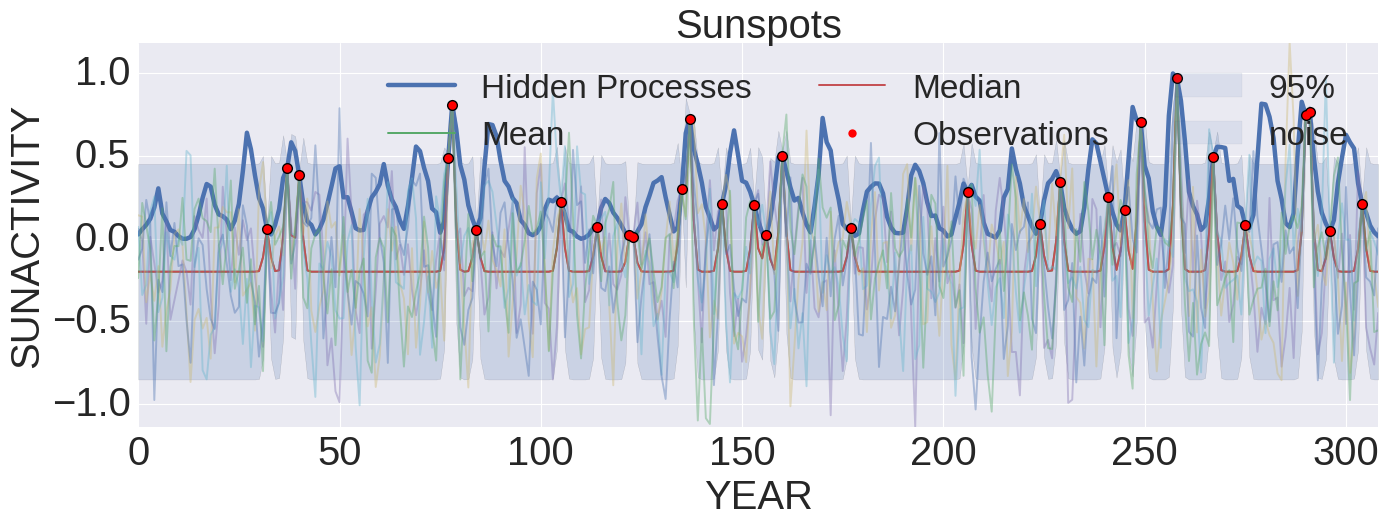

{'GP_SE_rate_log_': array([-0.06098508], dtype=float32), 'GP_Bias_Bias': 0.20936376, 'GP_SE_var_log_': -5.4279642, 'GP_Noise_var_log_': -3.7132928} 
 -19.1654052734375 {'BiasL2': 0.042617049, 'BiasL1': 0.15932208}


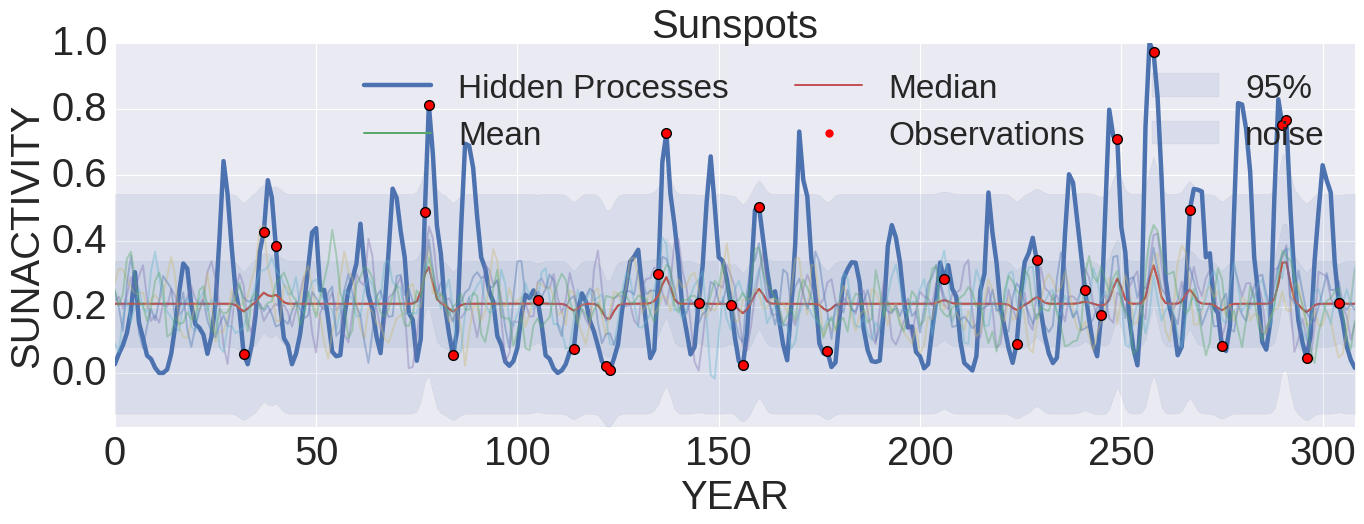

{'GP_SE_rate_log_': array([-2.34900141], dtype=float32), 'GP_Bias_Bias': 0.12268051, 'GP_SE_var_log_': -0.53625399, 'GP_Noise_var_log_': 0.32266366} 
 -37.638389587402344 {'BiasL2': 0.039410736, 'BiasL1': 0.15766658}


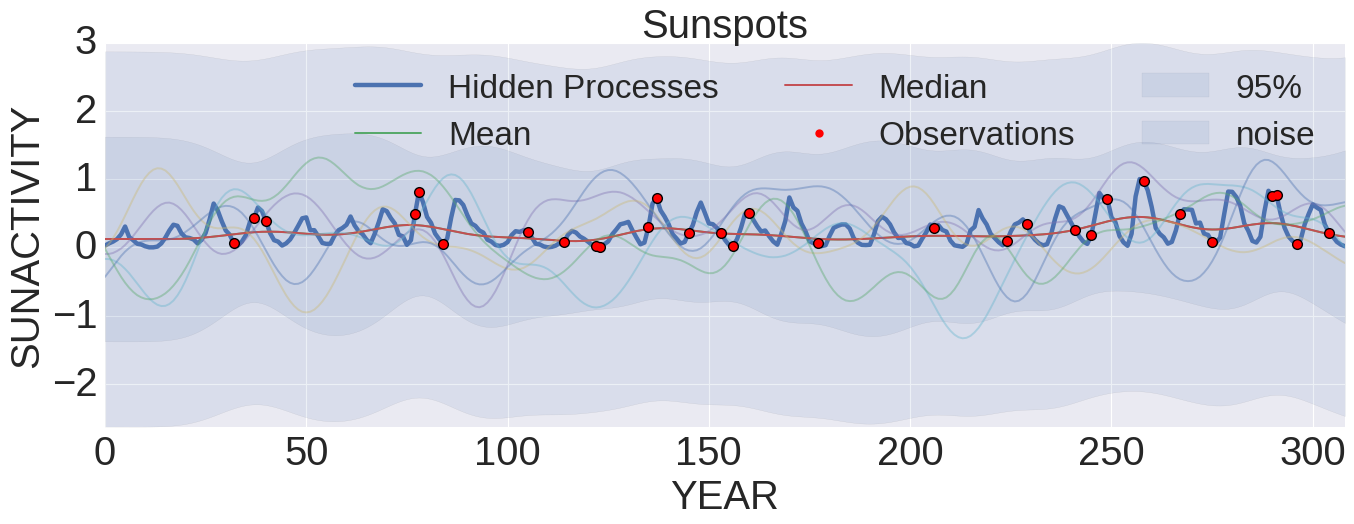

{'GP_SE_rate_log_': array([-4.23666859], dtype=float32), 'GP_Bias_Bias': -0.16112161, 'GP_SE_var_log_': -7.4101205, 'GP_Noise_var_log_': 4.3964343} 
 -93.57241821289062 {'BiasL2': 0.22372054, 'BiasL1': 0.4226498}


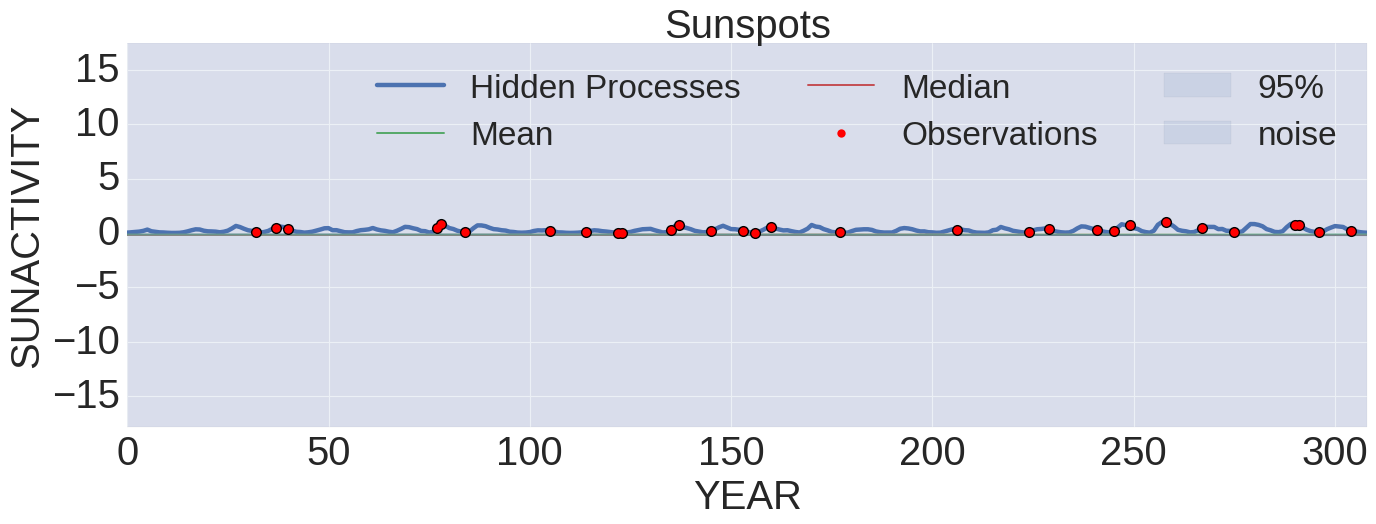

{'GP_SE_rate_log_': array([-3.56699824], dtype=float32), 'GP_Bias_Bias': 0.81401223, 'GP_SE_var_log_': -9.1547337, 'GP_Noise_var_log_': -4.4961505} 
 -358.9746398925781 {'BiasL2': 0.31376499, 'BiasL1': 0.5221889}


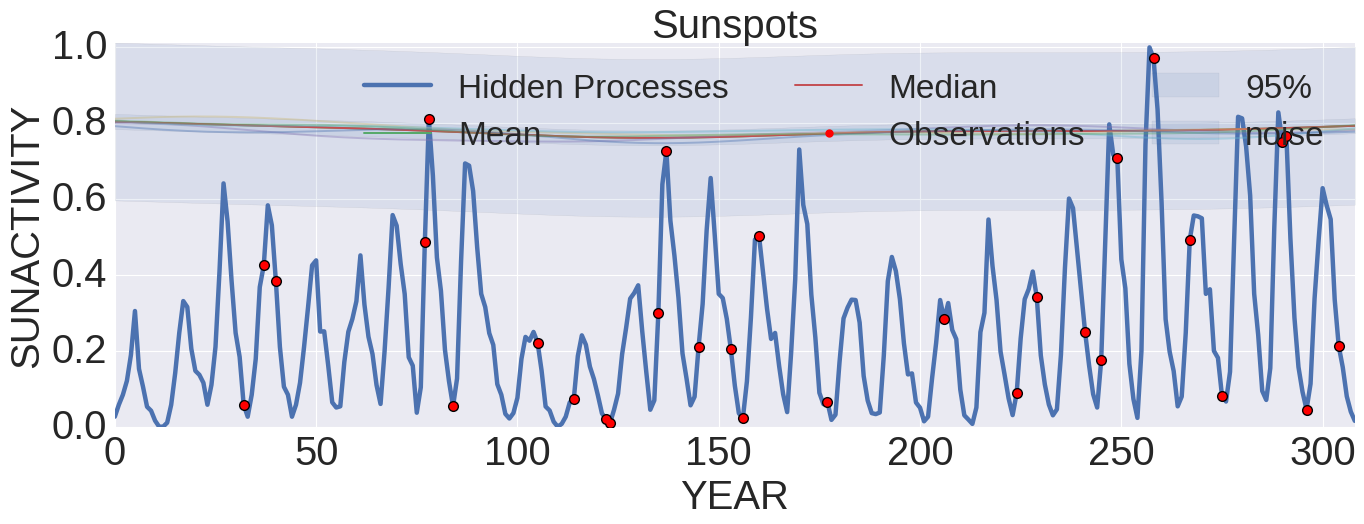

{'GP_SE_rate_log_': array([ 0.07599039], dtype=float32), 'GP_Bias_Bias': 0.13673651, 'GP_SE_var_log_': -6.40904, 'GP_Noise_var_log_': -1.1178017} 
 -15.942914962768555 {'BiasL2': 0.060451422, 'BiasL1': 0.17753999}


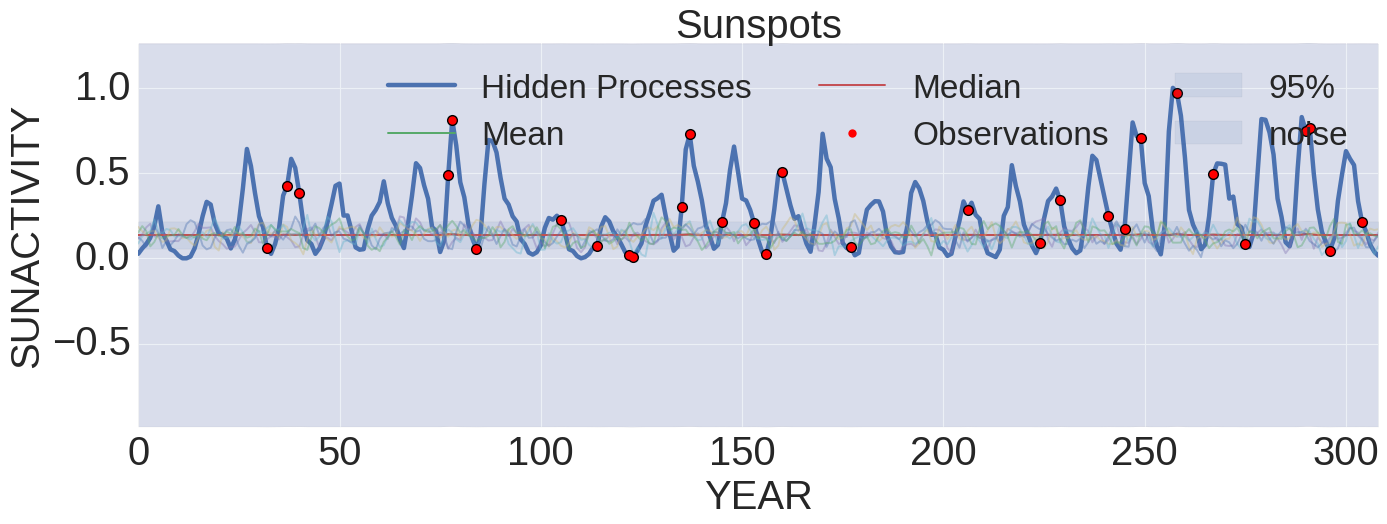

In [5]:
for k in range(10):
    params = gp.active.params_random(sigma=1)
    print(params,'\n' ,gp.logp(params), gp.scores(params, logp=False))
    gp.plot(params, samples=5, median=True)
    g3.show()

In [6]:
gp.widget(samples=5, median=True)

({'GP_Bias_Bias': 0.32474586,
  'GP_Noise_var_log_': array(-2.579943895339966, dtype=float32),
  'GP_SE_rate_log_': array([-2.23850632], dtype=float32),
  'GP_SE_var_log_': array(-2.579943895339966, dtype=float32)},
 array(-6.449182510375977, dtype=float32),
 {'BiasL1': 0.17532064, 'BiasL2': 0.044504743})

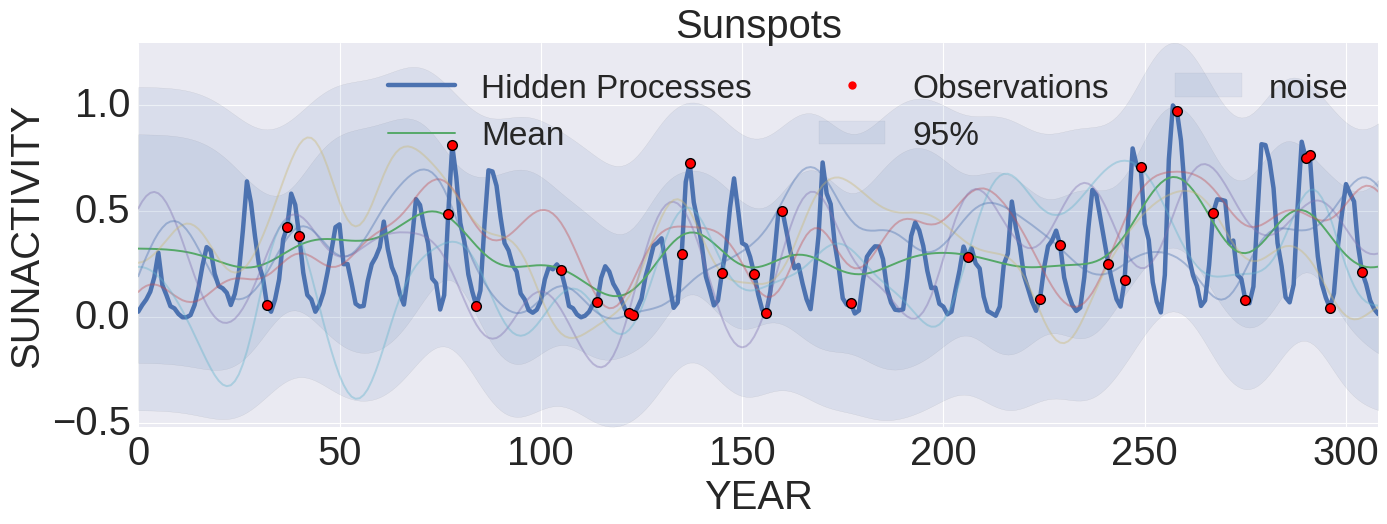

In [7]:
gp.plot(gp.params_widget, samples=5)
g3.plot_save('images/gp_sunspots1.pdf')
gp.params_widget, gp.logp(gp.params_widget), gp.scores(gp.params_widget, logp=False)

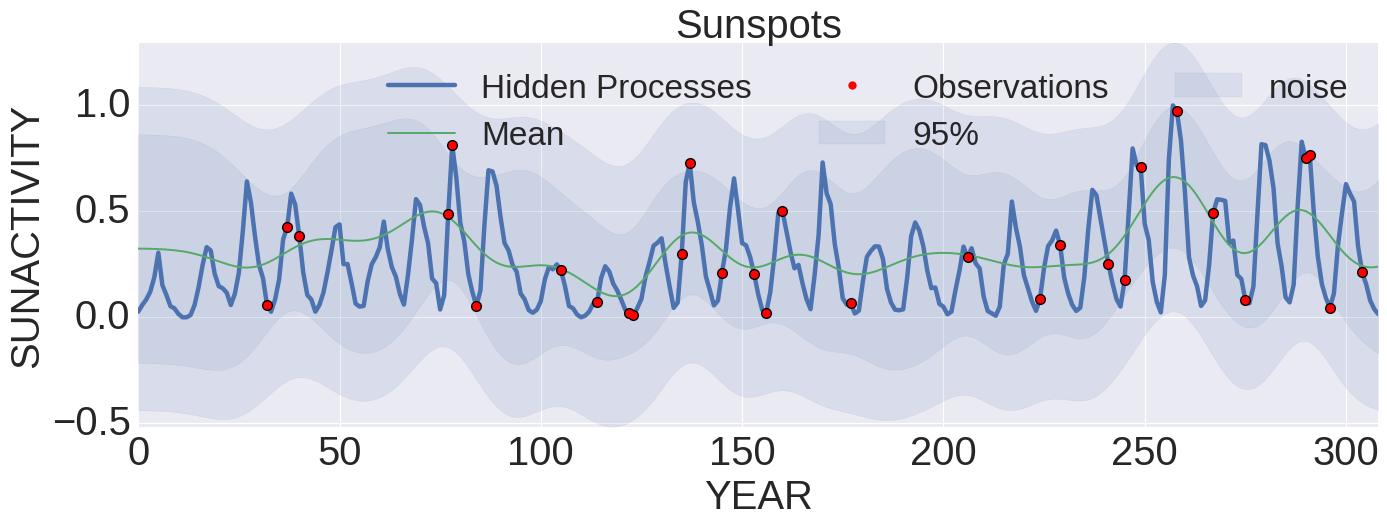

Starting function value (-logp): 6.44918

start_bfgs
         Current function value: 1.479027
         Iterations: 27
         Function evaluations: 50
         Gradient evaluations: 36

start_powell
Optimization terminated successfully.
         Current function value: 1.479305
         Iterations: 12
         Function evaluations: 716

start_bfgs_powell
Optimization terminated successfully.
         Current function value: 1.479023
         Iterations: 1
         Function evaluations: 97

start_powell_bfgs
         Current function value: 1.479271
         Iterations: 5
         Function evaluations: 133
         Gradient evaluations: 120


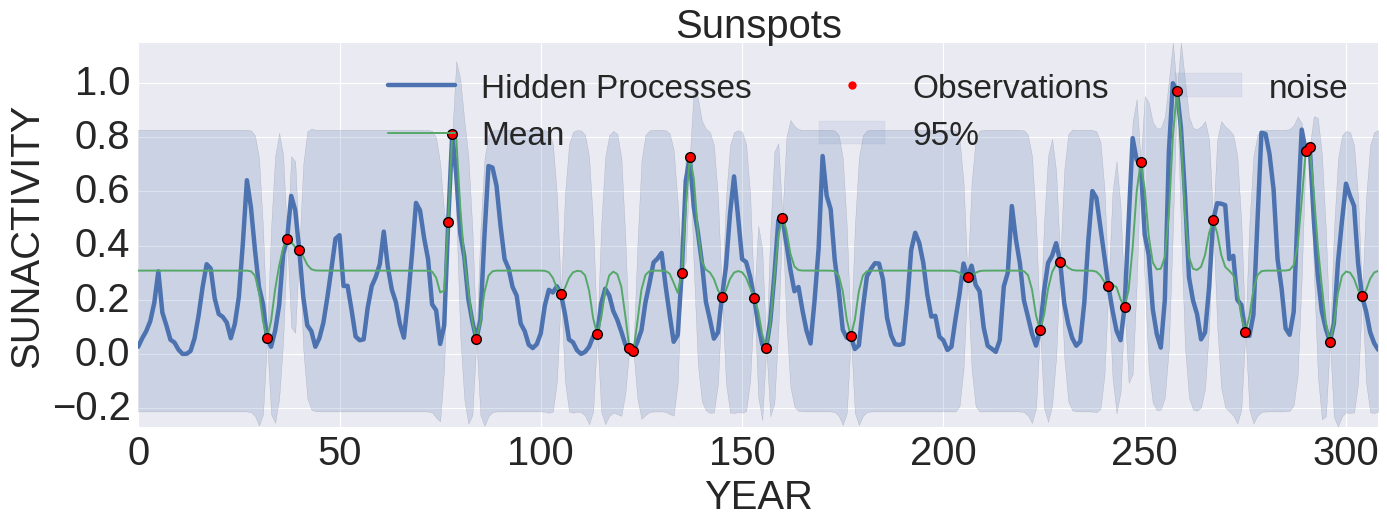

In [45]:
gp.plot(gp.active.params_default)
g3.show()
params_map = gp.find_MAP(gp.active.params_default, points=4)
gp.plot(params_map)

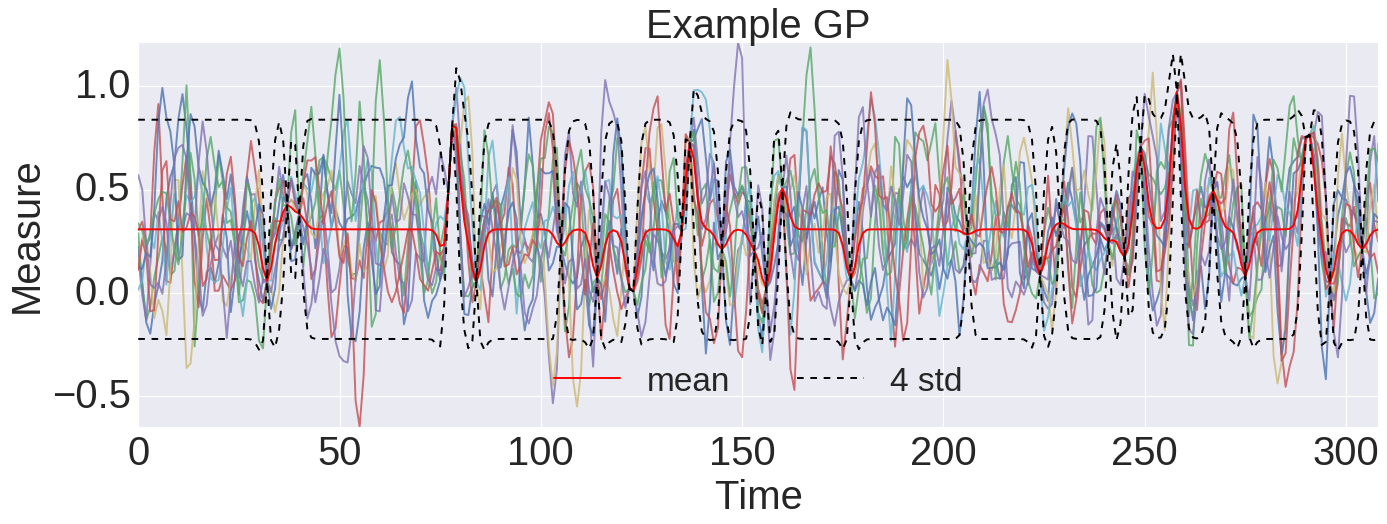

In [46]:
prediction = gp.predict(params_map, samples=10)
mu, std, samples = prediction.mean, prediction.std, prediction.samples
g3.plot(samples, alpha=0.8)
g3.plot(mu, 'r', label='mean')
g3.plot(mu + 2*std, '--k', label='4 std')
g3.plot(mu - 2*std, '--k')
g3.plot_text('Example GP', 'Time', 'Measure')
g3.plot_save('images/gp_sunspots3.pdf')

In [55]:
gp.active.calc_dimensions()
datatrace = gp.sample_hypers(params_map, samples=10000, chains=gp.ndim*2)
datatrace

Sampling 4 variables, 8 chains, 10000 times (None temps)


100%|██████████| 10000/10000 [00:24<00:00, 412.97it/s]


GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  GP_Bias_Bias  \
0             -14.799656           -0.258947       -2.901909      0.301246   
1             -14.799656           -0.258947       -2.901909      0.301246   
2             -14.799656           -0.258947       -2.901909      0.301246   
3             -14.799656           -0.258947       -2.901909      0.301246   
4             -14.799656           -0.258947       -2.901909      0.301246   
5             -14.799656           -0.258947       -2.901909      0.301246   
6             -14.799656           -0.258947       -2.901909      0.301246   
7             -14.799656           -0.258947       -2.901909      0.301246   
8             -14.799656           -0.258947       -2.901909      0.301246   
9             -14.799656           -0.258947       -2.901909      0.301246   
10            -13.661844           -0.285154       -2.633915      0.313475   
11            -13.661844           -0.285154       -2.633915      0.313475   
12            -13.661844           -0.285154       -2.633915      0.313475   
13            -13.661844           -0.285154       -2.633915      0.313475   
14            -13.661844           -0.285154       -2.633915      0.313475   
15            -13.661844           -0.285154       -2.633915      0.313475   
16            -13.661844           -0.285154       -2.633915      0.313475   
17            -13.571907           -0.278781       -2.595055      0.316935   
18            -13.571907           -0.278781       -2.595055      0.316935   
19            -13.553106           -0.316623       -2.749174      0.353893   
20            -12.800916           -0.324291       -2.565487      0.331589   
21            -12.800916           -0.324291       -2.565487      0.331589   
22            -12.696995           -0.339344       -2.599102      0.342447   
23            -12.753939           -0.335582       -2.617563      0.343302   
24            -12.619869           -0.311664       -2.485074      0.348320   
25            -12.544720           -0.319446       -2.464639      0.347353   
26            -12.199431           -0.349186       -2.487540      0.378112   
27            -11.615551           -0.422315       -2.644674      0.441513   
28            -11.615551           -0.422315       -2.644674      0.441513   
29            -11.615551           -0.422315       -2.644674      0.441513   
...                  ...                 ...             ...           ...   
79970          -8.603060           37.569821       -2.333464      0.316255   
79971          -8.603060           37.569821       -2.333464      0.316255   
79972          -8.603060           37.569821       -2.333464      0.316255   
79973          -8.603060           37.569821       -2.333464      0.316255   
79974          -8.603060           37.569821       -2.333464      0.316255   
79975          -8.603060           37.569821       -2.333464      0.316255   
79976          -7.476587           39.334915       -2.411374      0.321155   
79977          -7.476587           39.334915       -2.411374      0.321155   
79978          -7.476587           39.334915       -2.411374      0.321155   
79979          -7.615425           39.256640       -2.353843      0.325267   
79980          -8.995006           38.808722       -2.217052      0.320088   
79981          -8.995006           38.808722       -2.217052      0.320088   
79982         -11.266073           38.071360       -1.991867      0.311563   
79983         -11.266073           38.071360       -1.991867      0.311563   
79984         -10.303787           38.424526       -2.140980      0.309490   
79985         -12.669782           37.668619       -1.957571      0.296242   
79986         -12.669782           37.668619       -1.957571      0.296242   
79987         -12.669782           37.668619       -1.957571      0.296242   
79988         -12.669782           37.668619       -1.957571      0.296242   
79989         -12.669782     

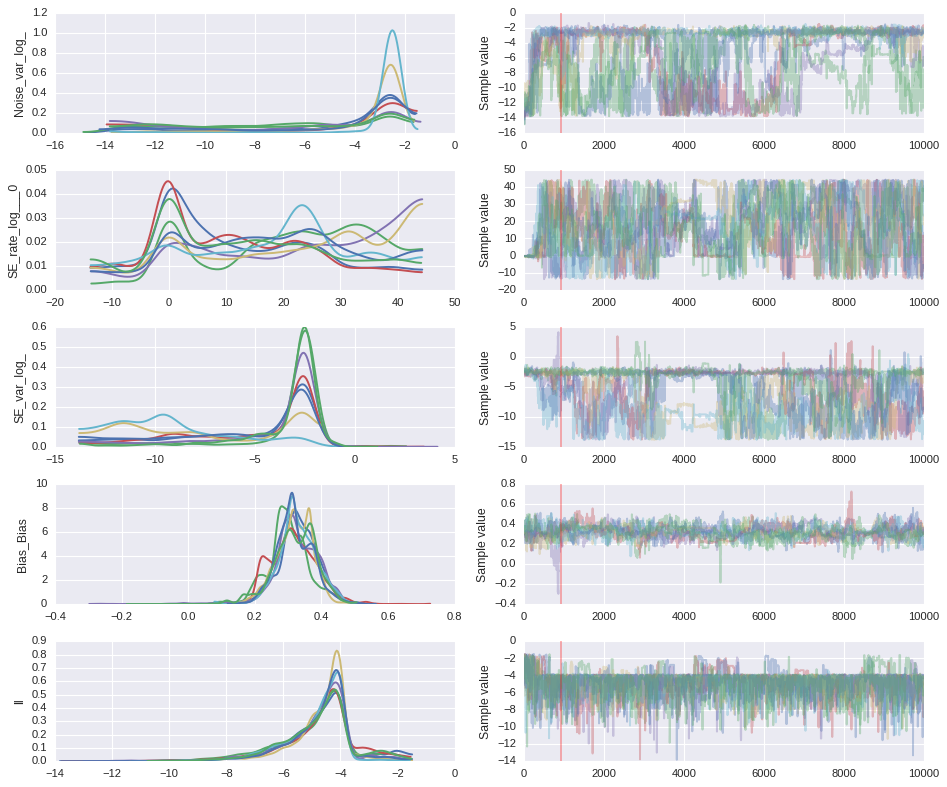

In [56]:
g3.style_seaborn()
g3.plot_datatrace(datatrace)

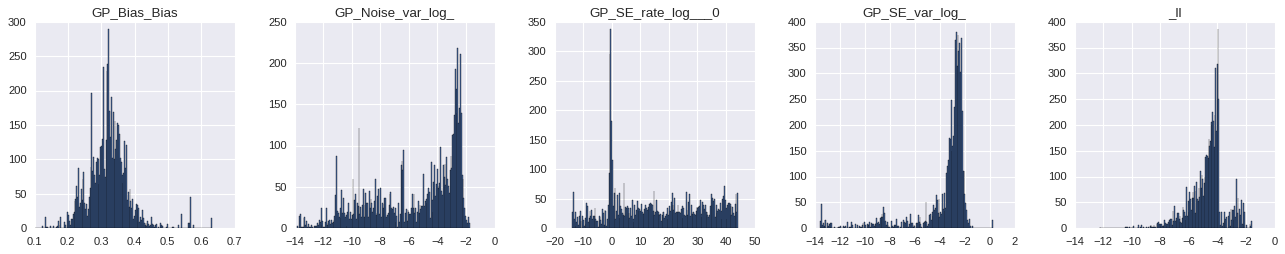

In [49]:
g3.hist_datatrace(datatrace)

In [59]:
g3.cluster_datatrace(gp, datatrace, n_components=5)

<function g3py.bayesian.average.cluster_datatrace.<locals>._cluster>

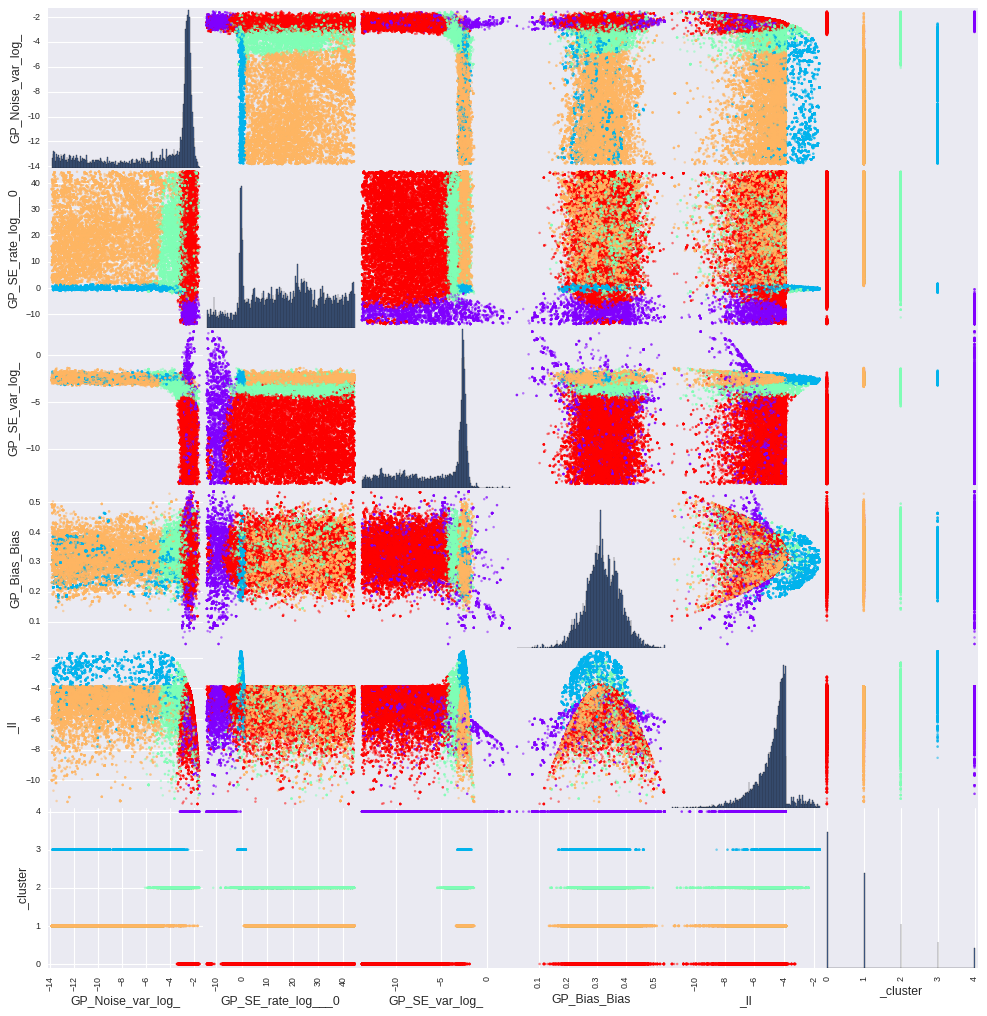

In [62]:
g3.scatter_datatrace(datatrace)

#7996 (49.975 %)


/grios-sync/Dropbox/Python/GaussianProcesses/G3Py/g3py/bayesian/average.py:382: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  cmap=cmap)
/grios-sync/Dropbox/Python/GaussianProcesses/G3Py/g3py/bayesian/average.py:382: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  cmap=cmap)


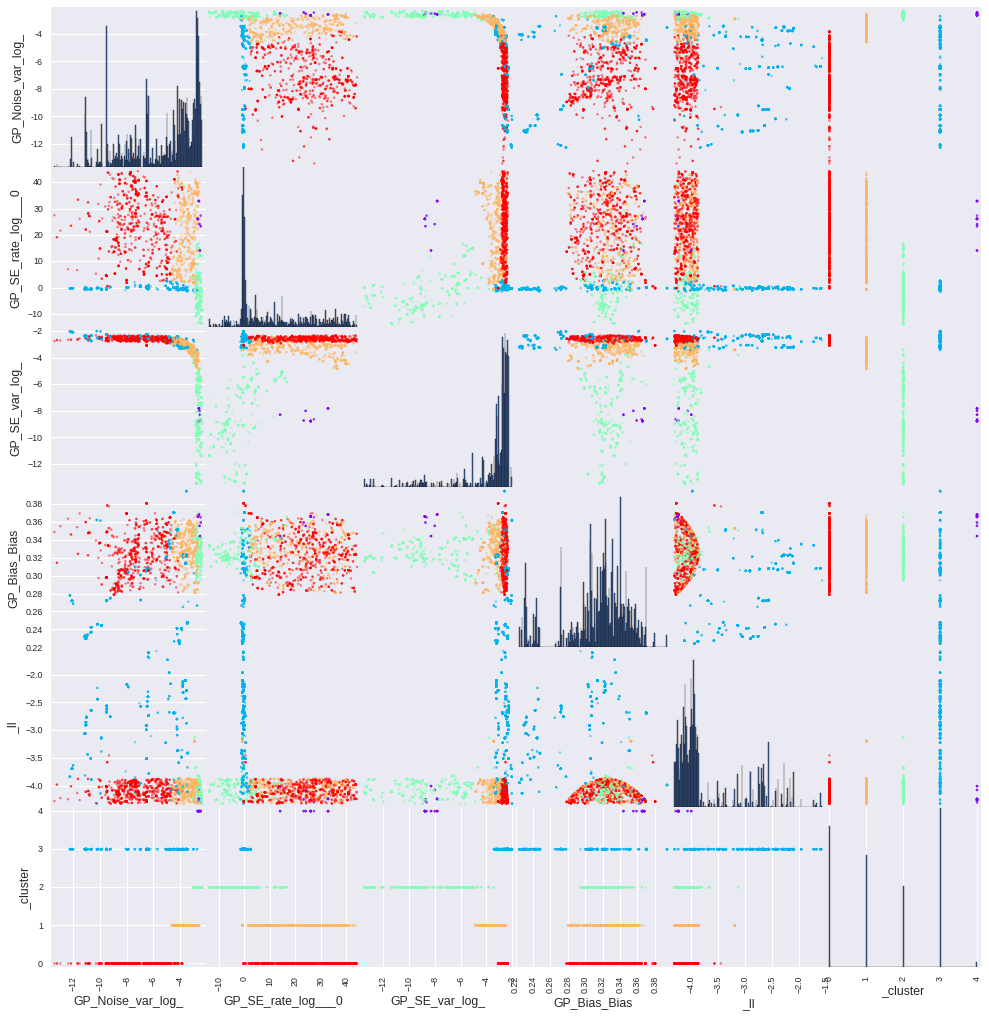

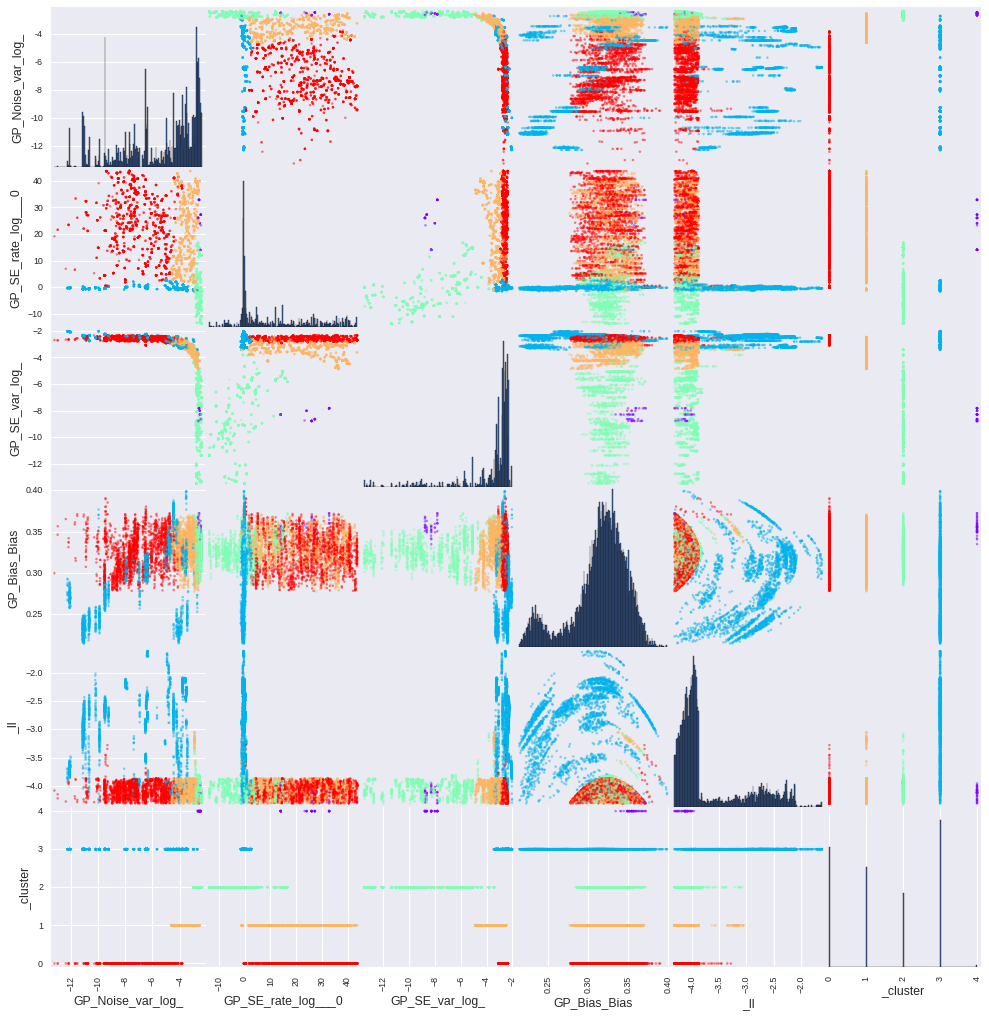

In [52]:
dt_conditional = g3.conditional(datatrace, lambda df: df['_ll'] > datatrace['_ll'].median())
g3.scatter_datatrace(dt_conditional)
kde = g3.datatrace_to_kde(gp, dt_conditional)
g3.scatter_datatrace(g3.kde_to_datatrace(gp, kde, nsamples=len(dt_conditional)))

In [53]:
modes = g3.find_candidates(datatrace, cluster=True)
modes

GP_Noise_var_log_  GP_SE_rate_log___0  GP_SE_var_log_  \
ll[206]            -7.998328           -0.287986       -2.648654   
ll[12070]         -11.708957           -0.256396       -2.639552   
ll[4420]           -3.320807           -0.898031       -3.432432   
ll[11688]          -2.891582           -0.649338       -3.815262   
ll[5885]           -2.486692           14.060579       -8.297236   

           GP_Bias_Bias  _nchain  _niter  _burnin  _outlayer       _ll  \
ll[206]        0.305076        0     206    False      False -1.483498   
ll[12070]      0.310698        6      70    False      False -1.483990   
ll[4420]       0.335149        2     420    False       True -2.650829   
ll[11688]      0.350041        5    1688     True       True -3.131195   
ll[5885]       0.343966        2    1885     True       True -4.002705   

           _cluster  
ll[206]           3  
ll[12070]         0  
ll[4420]          1  
ll[11688]         2  
ll[5885]          4

{'GP_SE_var_log_': array(-2.648653745651245, dtype=float32), 'GP_SE_rate_log_': array([-0.2879861], dtype=float32), 'GP_Bias_Bias': array(0.3050755560398102, dtype=float32), 'GP_Noise_var_log_': array(-7.99832820892334, dtype=float32)} -1.4834976196289062 {'BiasL2': 0.029914785, 'BiasL1': 0.13698457}


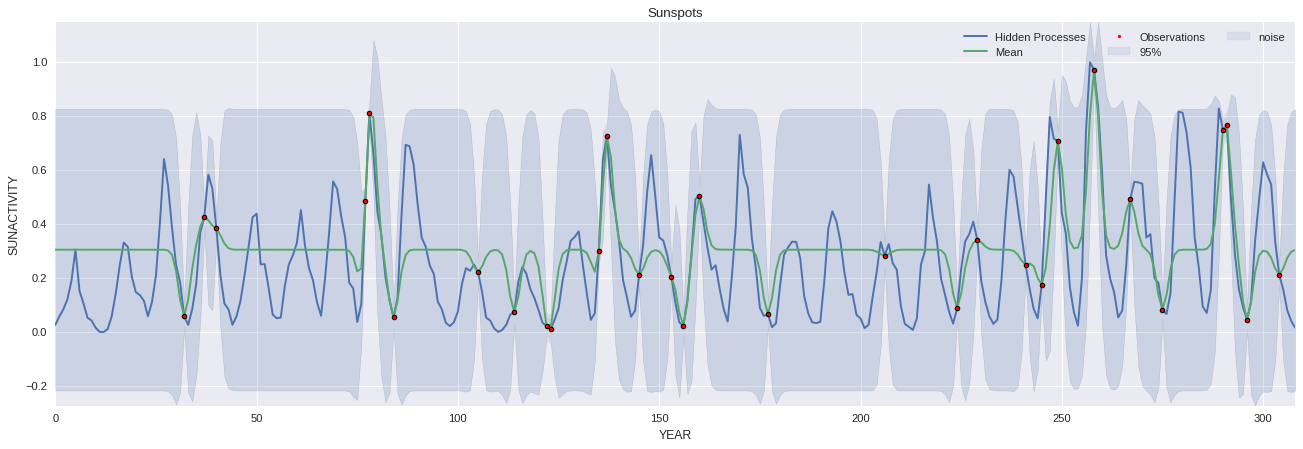

{'GP_SE_var_log_': array(-2.639552354812622, dtype=float32), 'GP_SE_rate_log_': array([-0.2563957], dtype=float32), 'GP_Bias_Bias': array(0.3106983006000519, dtype=float32), 'GP_Noise_var_log_': array(-11.70895767211914, dtype=float32)} -1.4839897155761719 {'BiasL2': 0.030473733, 'BiasL1': 0.13829774}


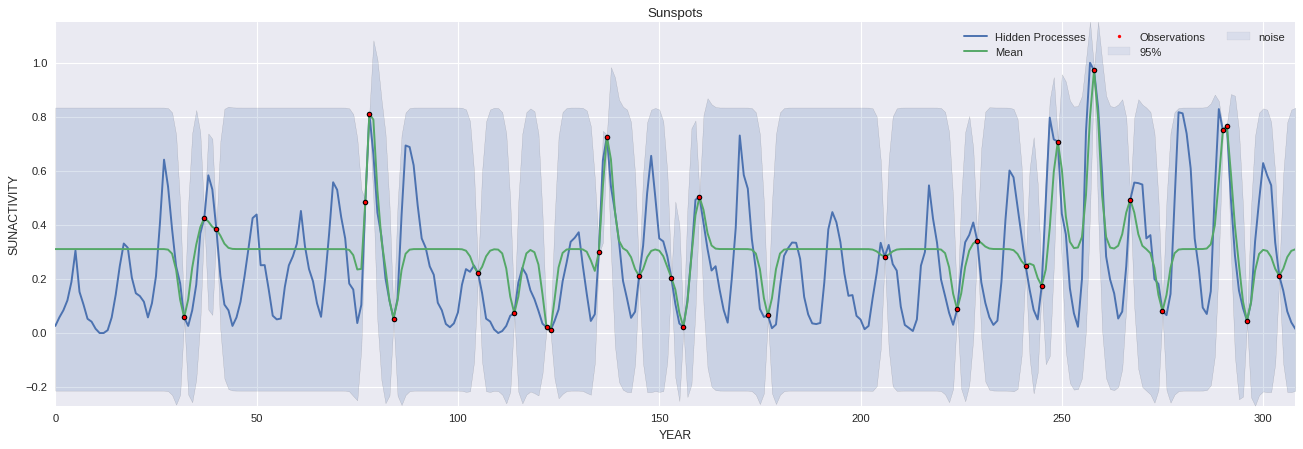

{'GP_SE_var_log_': array(-3.432432174682617, dtype=float32), 'GP_SE_rate_log_': array([-0.89803088], dtype=float32), 'GP_Bias_Bias': array(0.3351486325263977, dtype=float32), 'GP_Noise_var_log_': array(-3.3208069801330566, dtype=float32)} -2.650829315185547 {'BiasL2': 0.039191753, 'BiasL1': 0.16609123}


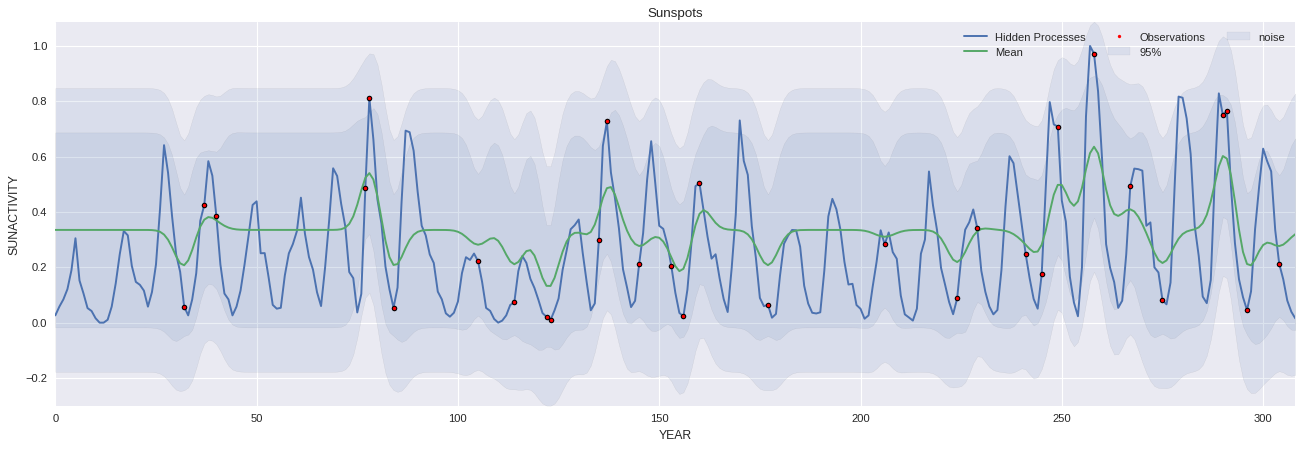

{'GP_SE_var_log_': array(-3.8152623176574707, dtype=float32), 'GP_SE_rate_log_': array([-0.64933777], dtype=float32), 'GP_Bias_Bias': array(0.3500407040119171, dtype=float32), 'GP_Noise_var_log_': array(-2.8915822505950928, dtype=float32)} -3.131195068359375 {'BiasL2': 0.043759353, 'BiasL1': 0.1790769}


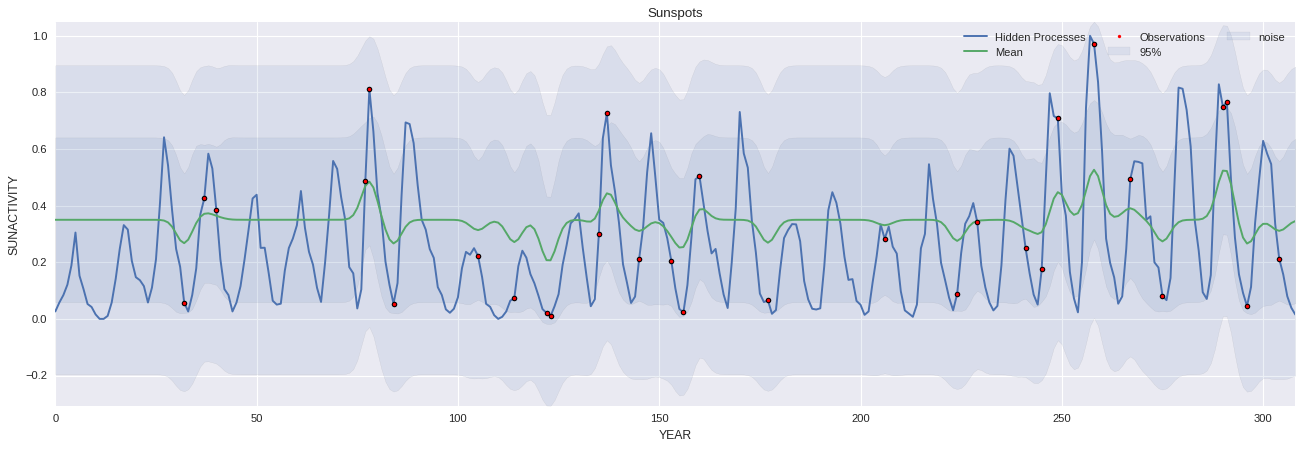

{'GP_SE_var_log_': array(-8.297236442565918, dtype=float32), 'GP_SE_rate_log_': array([ 14.06057835], dtype=float32), 'GP_Bias_Bias': array(0.34396570920944214, dtype=float32), 'GP_Noise_var_log_': array(-2.486691951751709, dtype=float32)} -4.002704620361328 {'BiasL2': 0.051831983, 'BiasL1': 0.19460797}


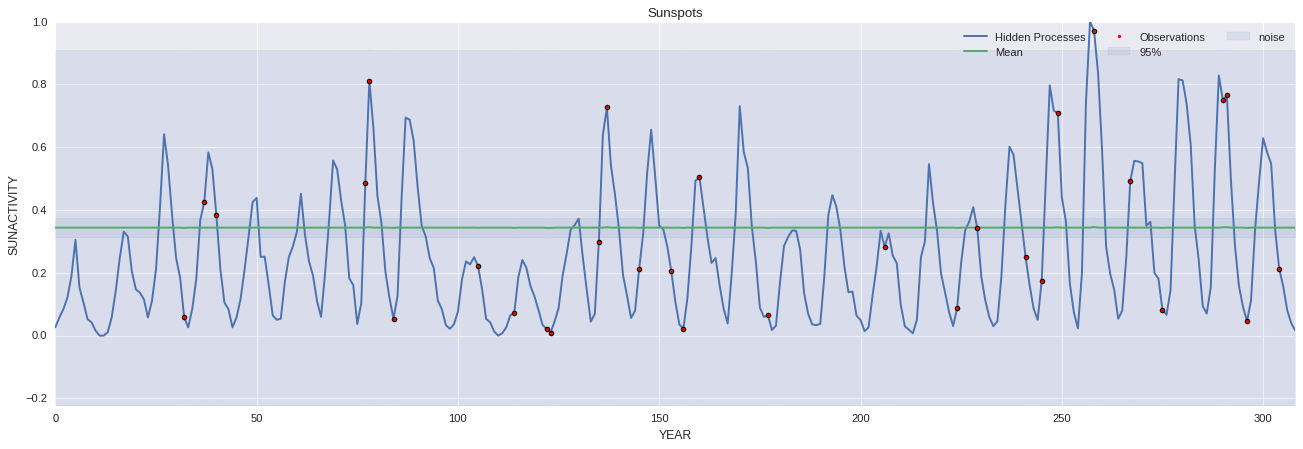

In [54]:
for k in modes.T:
    params = gp.active.params_datatrace(modes, k)
    print(params, gp.logp(params), gp.scores(params, logp=False))
    gp.plot(params)
    g3.show()

In [31]:
#TODO: predict(chain)

In [32]:
#TODO: mean BlackBox

In [ ]:
return

In [ ]:
gp.plot_model(params)

# Gaussian Random Fields

In [ ]:
g3.style_seaborn()

name_data = 'abalone'
names=['Sex','Length', 'Diam', 'Height', 'Whole', 'Shucked', 'Viscera','Shell','Rings']
abalone = pd.read_csv('data/abalone.csv', names=names)
#abalone['Sex'] = (abalone['Sex'] == 'M')*-1.0 + (abalone['Sex'] == 'F')*1.0 + 0.0
abalone = abalone.drop('Sex', axis=1) # Drop categoric variable
x = abalone.drop('Rings', axis=1).values.astype(dtype=np.float32)
y = abalone['Rings'].values.astype(dtype=np.float32)
p_obs = 0.3*0.2395
obs_j, x_obs, y_obs, test_j, x_test, y_test = g3.random_obs(x, y, p_obs)

In [ ]:
gp = g3.GaussianProcess(x.shape[1], g3.Bias(), g3.SE(x_obs), hidden=y, file='models/01-'+name_data+'_GP.g3')
gp.describe(name_data+' GP','time','measure','GP')
gp.observed(x_obs, y_obs, obs_j)
gp.set_space(x, y)
gp.plot(plot_space=True)

In [ ]:
params = gp.find_MAP(points=4)
gp.set_params(params)

In [ ]:
print('Test:   ', gp.scores(gp.get_params_test()))
print('Default:', gp.scores(gp.get_params_default()))
print('Current:', gp.scores(gp.get_params_current()))
gp.plot()